In [1]:
import warnings
warnings.filterwarnings('ignore')

- https://www.youtube.com/watch?v=jAQp0CpNvKc
- https://www.data.go.kr/dataset/15012005/fileData.do

In [2]:
import pandas as pd


In [3]:
import sys
!{sys.executable} -m pip install plotnine

You are using pip version 18.0, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from plotnine import *

## 2016년 상권별 업종밀집 통계


In [5]:
%ls commercial_store

store_201806_01.csv


In [6]:
shop_201806_01 = pd.read_csv('commercial_store/store_201806_01.csv', encoding='cp949')

In [7]:
shop_201806_01.shape

(476183, 39)

In [8]:
shop_201806_01.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196
3,28499926,독일지멘스보청기은평점,은평점,D,소매,D20,의약/의료품소매,D20A02,보청기판매,G47812,...,1138010300102810108040063,NaN,서울특별시 은평구 통일로 732,122040,3368.0,NaN,2,NaN,126.929871,37.610888
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315


In [9]:
shop_201806_01.isnull().sum()

상가업소번호            0
상호명               1
지점명          416061
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      27664
표준산업분류명       27664
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         80599
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        413186
건물관리번호            0
건물명          265997
도로명주소             0
구우편번호             0
신우편번호             9
동정보          433303
층정보          184584
호정보          405945
경도                0
위도                0
dtype: int64

In [10]:
!{sys.executable} -m pip install missingno

You are using pip version 18.0, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
shop_201806_01.columns

Index([u'상가업소번호', u'상호명', u'지점명', u'상권업종대분류코드', u'상권업종대분류명', u'상권업종중분류코드',
       u'상권업종중분류명', u'상권업종소분류코드', u'상권업종소분류명', u'표준산업분류코드', u'표준산업분류명',
       u'시도코드', u'시도명', u'시군구코드', u'시군구명', u'행정동코드', u'행정동명', u'법정동코드',
       u'법정동명', u'지번코드', u'대지구분코드', u'대지구분명', u'지번본번지', u'지번부번지', u'지번주소',
       u'도로명코드', u'도로명', u'건물본번지', u'건물부번지', u'건물관리번호', u'건물명', u'도로명주소',
       u'구우편번호', u'신우편번호', u'동정보', u'층정보', u'호정보', u'경도', u'위도'],
      dtype='object')

In [12]:
shop_201806_01[[u'상호명', u'지점명', u'상권업종대분류명', u'상권업종중분류명', 
                u'상권업종소분류명',  u'시도명', u'시군구명',u'행정동명', 
                u'지번주소', u'경도', u'위도']]

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,지번주소,경도,위도
0,엘가커피부산아시아드점,부산아시아드점,음식,커피점/카페,커피전문점/카페/다방,부산광역시,연제구,거제2동,부산광역시 연제구 거제동 1208,129.062034,35.191284
1,비비안아울렛중계점,아울렛중계점,소매,의복의류,셔츠/내의/속옷,서울특별시,노원구,중계2.3동,서울특별시 노원구 중계동 509,127.067888,37.641280
2,연세정신건강의학과의원,NaN,의료,병원,기타병원,서울특별시,종로구,창신1동,서울특별시 종로구 창신동 297,127.014500,37.573196
3,독일지멘스보청기은평점,은평점,소매,의약/의료품소매,보청기판매,서울특별시,은평구,불광1동,서울특별시 은평구 불광동 281-108,126.929871,37.610888
4,서울모드,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,신사동,서울특별시 강남구 신사동 517-27,127.022212,37.519315
5,만포장횟집,NaN,음식,일식/수산물,횟집,부산광역시,연제구,거제1동,부산광역시 연제구 거제동 1476-7,129.067294,35.193906
6,미처버린파닭양정점,양정점,음식,닭/오리요리,후라이드/양념치킨,부산광역시,부산진구,양정1동,부산광역시 부산진구 양정동 350-61,129.070871,35.171033
7,하이마트키즈부산롯데마트점,키즈부산롯데마트점,소매,가전제품소매,일반가전제품,부산광역시,부산진구,부암1동,부산광역시 부산진구 부암동 257,129.049343,35.163325
8,국대떡볶이길음역점,길음역점,음식,분식,떡볶이전문,서울특별시,성북구,길음1동,서울특별시 성북구 길음동 1276,127.024543,37.603455
9,아리따움IFC점,IFC점,소매,화장품소매,화장품판매점,서울특별시,영등포구,여의동,서울특별시 영등포구 여의도동 2-6,126.923949,37.521893


In [13]:
shop_201806_01.isnull().sum()

상가업소번호            0
상호명               1
지점명          416061
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      27664
표준산업분류명       27664
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         80599
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        413186
건물관리번호            0
건물명          265997
도로명주소             0
구우편번호             0
신우편번호             9
동정보          433303
층정보          184584
호정보          405945
경도                0
위도                0
dtype: int64

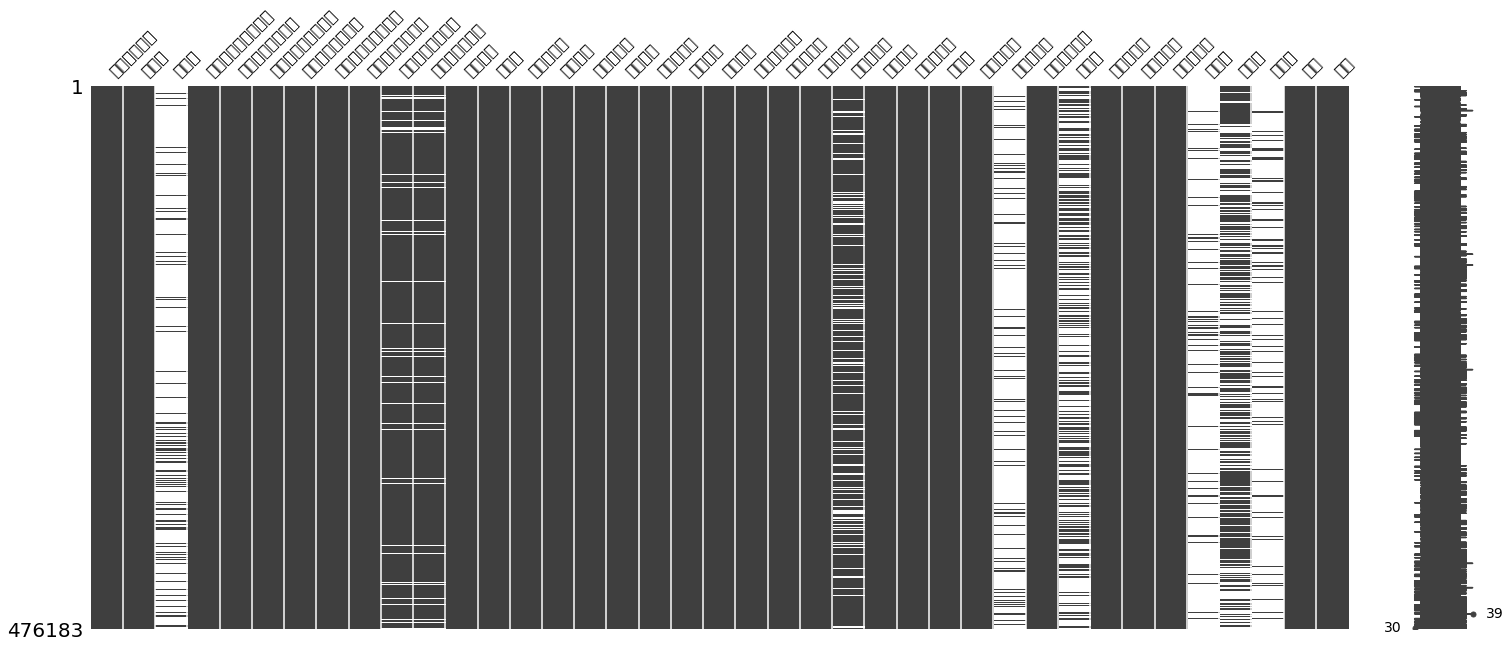

In [14]:
import missingno as msno
msno.matrix(shop_201806_01)

In [15]:
# (ggplot(shop_201806_01[:1000])
# + aes(x=u'경도', y=u'위도')
# + geom_point())

In [16]:
shop_seoul = shop_201806_01.loc[shop_201806_01[u'도로명주소'].str.startswith(u'서울')]
shop_except_seoul = shop_201806_01.loc[~shop_201806_01[u'도로명주소'].str.startswith(u'서울')]
print(shop_seoul.shape)
print(shop_except_seoul.shape)

(330089, 39)
(146094, 39)


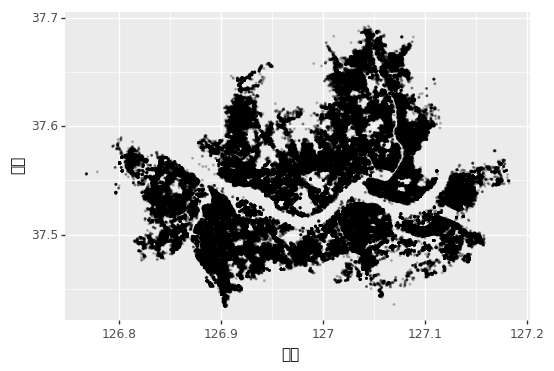

<ggplot: (8729023339757)>

In [20]:
(ggplot(shop_seoul)
 + aes(x=u'경도', y=u'위도')
 + geom_point(color='black', alpha=0.2, size=0.2)
)

In [21]:
shop_201806_01[u'도로명주소'].head()

0       부산광역시 연제구 종합운동장로 7
1    서울특별시 노원구 동일로204가길 46
2       서울특별시 종로구 종로 335-3
3        서울특별시 은평구 통일로 732
4     서울특별시 강남구 도산대로11길 29
Name: 도로명주소, dtype: object

In [22]:
print(shop_201806_01.shape)

(476183, 39)


In [24]:
shop_201806_01[u'시도'] = shop_201806_01[u'도로명주소'].str.split(' ', expand=True)[0]
shop_201806_01[u'구군'] = shop_201806_01[u'도로명주소'].str.split(' ', expand=True)[1]
print(shop_201806_01.shape)

(476183, 41)


In [27]:
shop_seoul = shop_201806_01.loc[shop_201806_01[u'도로명주소'].str.startswith(u'서울')]
shop_seoul.shape

(330089, 41)

In [36]:
shop_seoul[u'상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64